In [11]:
from bs4 import BeautifulSoup
import requests
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Scraping winners of olympic marathons from wikipedia

In [12]:
def scrape_wikipedia(url, output_file):
    # Send a GET request to the Wikipedia page
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find and print the title of the Wikipedia page
        title = soup.find('h1', {'id': 'firstHeading'})
        print(f"Title: {title.text.strip()}")

        # Find and print the main content of the page
        content = soup.find('div', {'id': 'mw-content-text'})
        paragraphs = content.find_all('p')
        text_content = '\n'.join(paragraph.text for paragraph in paragraphs)

        with open(output_file, 'w', encoding='utf-8') as file:
            file.write(f"Title: {title}\n\n")
            file.write(text_content)

    else:
        print(f"Failed to retrieve the page. Status code: {response.status_code}")

# Replace 'https://en.wikipedia.org/wiki/Your_Page_Title' with the URL of the Wikipedia page you want to scrape
# url = 'https://en.wikipedia.org/wiki/Astronomy'
# output_file = 'wiki_scraped_data.txt'
# scrape_wikipedia(url, output_file)


In [13]:
# get the response in the form of html
wikiurl="https://en.wikipedia.org/wiki/Marathons_at_the_Olympics"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)

200


In [14]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.find('table',{'class':"wikitable"})


In [15]:
df = pd.read_html(str(indiatable)) # this is a list
print (len(df))
df = pd.DataFrame(df[0])             # convert to df
df.head()
# Adjusted regular expression
df.to_csv('wiki.csv')

1


/var/folders/_p/y56kr6vs1fz7ycsbxhyqwwwc0000gn/T/ipykernel_47001/938132580.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(indiatable)) # this is a list


In [16]:
df = pd.read_csv('Olympic_Games.csv').drop(columns={'Unnamed: 0'})
# df[['Year', 'Location']] = df['Games'].str.split(n=1, expand=True)
df.dropna(how='any', axis = 0)
# df.columns

,Year,Location,Gold_Name,Gold_Country,Silver_Name,Silver_Country,Bronze_Name,Bronze_Country
0,1896,Athens,Spyridon Louis,Greece,Charilaos Vasilakos,Greece,Gyula Kellner,Hungary
1,1900,Paris,Michel Théato,Luxembourg,Émile Champion,France,Ernst Fast,Sweden
2,1904,St. Louis,Thomas Hicks,United States,Albert Corey,France,Arthur Newton,United States
3,1908,London,Johnny Hayes,United States,Charles Hefferon,South Africa,Joseph Forshaw,United States
4,1912,Stockholm,Ken McArthur,South Africa,Christian Gitsham,South Africa,Gaston Strobino,United States
5,1920,Antwerp,Hannes Kolehmainen,Finland,Jüri Lossmann,Estonia,Valerio Arri,Italy
6,1924,Paris,Albin Stenroos,Finland,Romeo Bertini,Italy,Clarence DeMar,United States
7,1928,Amsterdam,Boughera El Ouafi,France,Manuel Plaza,Chile,Martti Marttelin,Finland
8,1932,Los Angeles,Juan Carlos Zabala,Argentina,Sam Ferris,Great Britain,Armas Toivonen,Finland
9,1936,Berlin,Sohn Kee-chung,Japan,Ernest Harper,Great Britain,Nam Sung-yong,Japan


<Axes: xlabel='Gold_Country'>

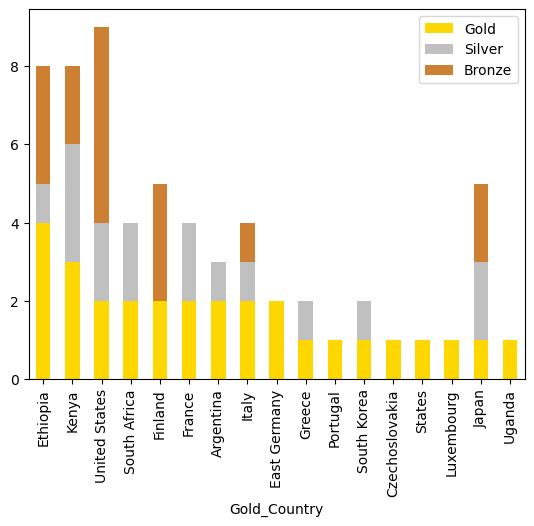

In [17]:
# bar plot of medal counts by country
# bubble plot of medal counts by country
# plot locations of where they have taken place and during which years
# hist of medal counts by athelete

country_medals = pd.DataFrame()

country_medals['Gold'] = df['Gold_Country'].value_counts()
country_medals['Silver'] = df['Silver_Country'].value_counts()
country_medals['Bronze'] = df['Bronze_Country'].value_counts()
country_medals['Total'] = country_medals['Gold'] + country_medals['Silver'] + country_medals['Bronze']

country_medals = country_medals.fillna(0)
colors = ['#FFD700', '#C0C0C0', '#CD7F32']
country_medals[['Gold', 'Silver', 'Bronze']].plot(kind='bar', stacked=True, color = colors)


In [19]:
country_medals.to_csv('Olympic_Country_Medals.csv')

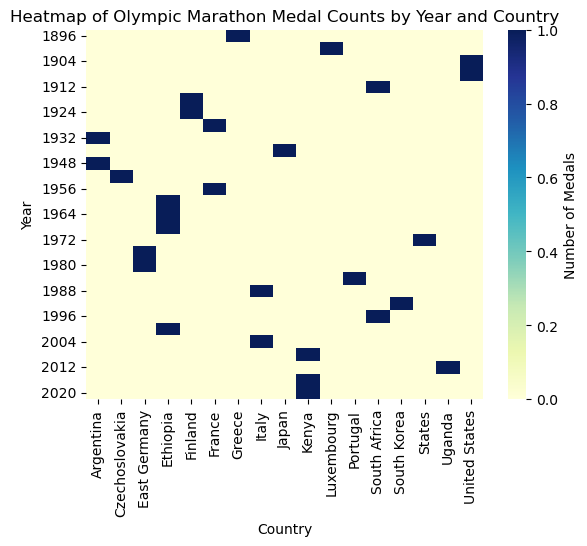

In [61]:
medal_counts_heatmap = pd.pivot_table(df, index='Year', columns='Gold_Country', aggfunc='size', fill_value=0)
medal_counts_heatmap += pd.pivot_table(df, index='Year', columns='Silver_Country', aggfunc='size', fill_value=0)
medal_counts_heatmap += pd.pivot_table(df, index='Year', columns='Bronze_Country', aggfunc='size', fill_value=0)

# Plot the heatmap
# plt.figure(figsize=(12, 8))
sns.heatmap(medal_counts_heatmap, cmap='YlGnBu', cbar_kws={'label': 'Number of Medals'})
plt.title('Heatmap of Olympic Marathon Medal Counts by Year and Country')
plt.xlabel('Country')
plt.ylabel('Year')

# Show the plot
plt.show()